# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
%matplotlib inline

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/cities.csv"

# Range of latitudes and longitudes
Latitude_range = (-90, 90)
Longitude_range = (-180, 180)

## Generate Cities List

In [138]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [139]:
print("Start City Data Retrival")
print("--------------------------------------------------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Create a list
Nameof_city_list = []
NumberofClouds_list = []
Country_list = []
Currentdate_list = []
HumidityTemp_list = []
Latitude_list = []
Longitude_list = []
Maximumtemp_list = []
Windspeed_list = []
Index_count = 0
Set_count = 1


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        Nameof_city_list.append(response["name"])
        NumberofClouds_list.append(response["clouds"]["all"])
        Country_list.append(response["sys"]["country"])
        Currentdate_list.append(response["dt"])
        HumidityTemp_list.append(response["main"]["humidity"])
        Latitude_list.append(response["coord"]["lat"])
        Longitude_list.append(response["coord"]["lon"])
        Maximumtemp_list.append(response['main']['temp_max'])
        Windspeed_list.append(response["wind"]["speed"])
        if Index_count > 49:
            Index_count = 0
            Set_count = Set_count + 1
    
        else:
            Index_count = Index_count + 1
            
        print(f"Processing Record {Index_count} of Set {Set_count} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")



print("-----------------------------")
print("CityData Retrieval Complete")

Start City Data Retrival
--------------------------------------------------------------------------
Processing Record 1 of Set 1 : yellowknife
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : bluff
Processing Record 4 of Set 1 : saint-philippe
Processing Record 5 of Set 1 : east london
Processing Record 6 of Set 1 : ushuaia
Processing Record 7 of Set 1 : thinadhoo
Processing Record 8 of Set 1 : draguignan
Processing Record 9 of Set 1 : cape town
Processing Record 10 of Set 1 : marsa matruh
Processing Record 11 of Set 1 : salalah
Processing Record 12 of Set 1 : skjervoy
Processing Record 13 of Set 1 : san andres
Processing Record 14 of Set 1 : vaini
Processing Record 15 of Set 1 : hobart
Processing Record 16 of Set 1 : hilo
Processing Record 17 of Set 1 : haverfordwest
Processing Record 18 of Set 1 : punta arenas
Processing Record 19 of Set 1 : port alfred
Processing Record 20 of Set 1 : pevek
Processing Record 21 of Set 1 : coihaique
Processing Record 22 of Set 1 :

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [140]:
# Create a panda data frame using data retrieved
Cityweather_dict = pd.DataFrame({ 
                "City" : Nameof_city_list,
                "Cloudiness" : NumberofClouds_list ,
                "Country" : Country_list,
                "Date" : Currentdate_list,
                "Humidity" : HumidityTemp_list,
                "Latitude" : Latitude_list,
                "Longitude" : Longitude_list,
                "Max Temp" : Maximumtemp_list,
                "Wind Speed" : Windspeed_list,
})

In [141]:
# Count data
Cityweather_dict.count()

City          593
Cloudiness    593
Country       593
Date          593
Humidity      593
Latitude      593
Longitude     593
Max Temp      593
Wind Speed    593
dtype: int64

In [142]:
# Display the Data Frame
Cityweather_dict

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Yellowknife,90,CA,1638334538,83,62.4560,-114.3525,-12.59,4.00
1,Rikitea,0,PF,1638334538,76,-23.1203,-134.9692,76.41,20.69
2,Bluff,9,NZ,1638334539,74,-46.6000,168.3333,68.81,18.41
3,Saint-Philippe,88,RE,1638334539,74,-21.3585,55.7679,81.95,8.21
4,East London,75,ZA,1638334347,94,-33.0153,27.9116,63.54,3.44
...,...,...,...,...,...,...,...,...,...
588,Oussouye,8,SN,1638334716,55,12.4850,-16.5469,71.62,6.93
589,Hastings,84,GB,1638334716,85,50.8552,0.5729,51.30,25.19
590,Gamba,100,GA,1638334474,89,-2.6500,10.0000,77.04,3.58
591,Pathein,26,MM,1638334717,60,16.7833,94.7333,81.88,13.47


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [143]:
# check for and clean out impossible statistics
Cityweather_dict[Cityweather_dict["Humidity"]>100]

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


In [144]:
#  Get the indices of cities that have humidity over 100%.
indices = Cityweather_dict[Cityweather_dict["Humidity"]>100].index
indices

Int64Index([], dtype='int64')

In [145]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
Citiescleaned = Cityweather_dict.drop(indices)
Citiescleaned

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Yellowknife,90,CA,1638334538,83,62.4560,-114.3525,-12.59,4.00
1,Rikitea,0,PF,1638334538,76,-23.1203,-134.9692,76.41,20.69
2,Bluff,9,NZ,1638334539,74,-46.6000,168.3333,68.81,18.41
3,Saint-Philippe,88,RE,1638334539,74,-21.3585,55.7679,81.95,8.21
4,East London,75,ZA,1638334347,94,-33.0153,27.9116,63.54,3.44
...,...,...,...,...,...,...,...,...,...
588,Oussouye,8,SN,1638334716,55,12.4850,-16.5469,71.62,6.93
589,Hastings,84,GB,1638334716,85,50.8552,0.5729,51.30,25.19
590,Gamba,100,GA,1638334474,89,-2.6500,10.0000,77.04,3.58
591,Pathein,26,MM,1638334717,60,16.7833,94.7333,81.88,13.47


In [146]:
# Save city data into a csv file
Cityweather_dict.to_csv("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

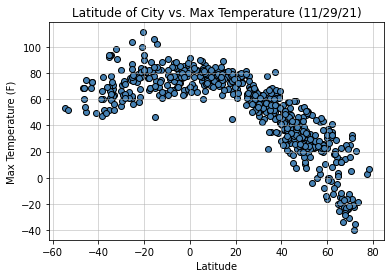

In [147]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(Cityweather_dict["Latitude"], Cityweather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude of City vs. Max Temperature (11/29/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

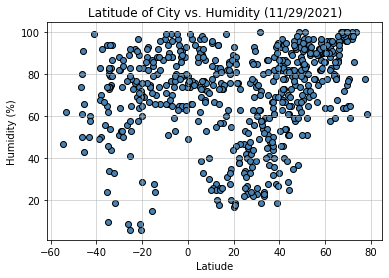

In [148]:
# Scatter plot for  Latitude vs. Humidity Plot
plt.scatter(Cityweather_dict["Latitude"], Cityweather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude of City vs. Humidity (11/29/2021)")

# Set x axis label
plt.xlabel("Latiude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

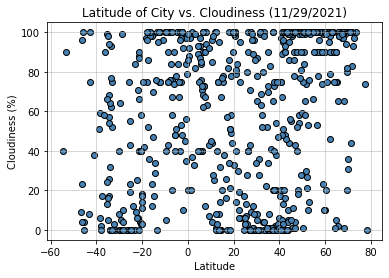

In [149]:
#Scatter plot for latitude vs cloudiness
plt.scatter(Cityweather_dict["Latitude"], Cityweather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude of City vs. Cloudiness (11/29/2021)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

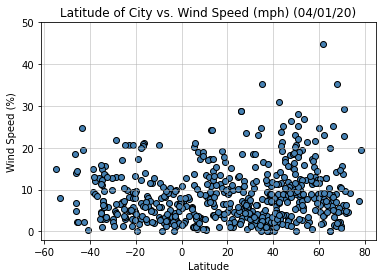

In [150]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(Cityweather_dict["Latitude"], Cityweather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#Set Title
plt.title("Latitude of City vs. Wind Speed (mph) (04/01/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [151]:
# Create Northern and Southern Hemisphere DataFrames
North_Hemisphere_data = Cityweather_dict[Cityweather_dict['Latitude'] >= 0]

# Create new data frame for southern hemisphere (lat < 0 degree):
South_Hemisphere_data = Cityweather_dict[Cityweather_dict['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

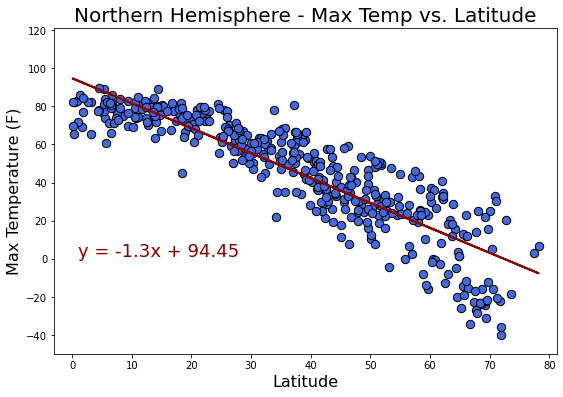

In [152]:
# Build scatter plot
plt.figure(figsize=(9,6))
x_plot = North_Hemisphere_data['Latitude']
y_plot = North_Hemisphere_data['Max Temp']

# Get linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_plot, y_plot)

# Get regression values:
regress_values = x_plot * slope + intercept

# Create line equation for plot:
Linear_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_plot,y_plot, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_plot,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(min(Cityweather_dict['Max Temp'])-10, max(Cityweather_dict['Max Temp'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(Cityweather_dict['Latitude'])+3)



# Save the figure:
plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/Northern Hemisphere - Max Temp vs Latitude Linear Regression.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

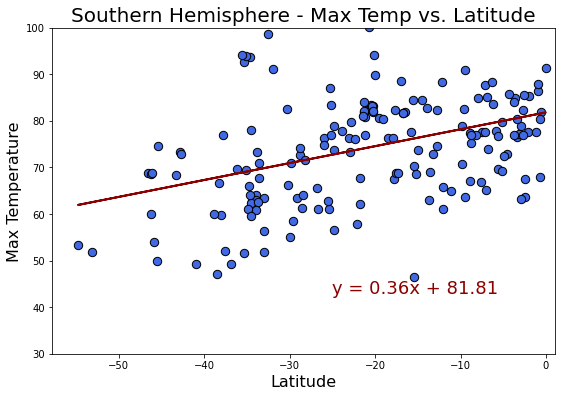

In [153]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_plot = South_Hemisphere_data['Latitude']
y_plot = South_Hemisphere_data['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_plot, y_plot)

# Calculate Line:
regress_values = x_plot * slope + intercept

# Create line equation string:
Line_equa2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_plot,y_plot, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_plot,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(Line_equa2,(-25,43),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(30, 100)

# Set the limits of the x axis:
plt.xlim(min(Cityweather_dict['Latitude'])-3, +1)


# Save the figure:
plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/Southern Hemisphere - Max Temp vs Latitude Linear Regression.png")

#Compare Northern Hemishere Max Temp vs Southern Hemisphere Max Temp plot
print("Northern Hemispher temp and the latitude are not correlated while the southern hemisphere are more positive influenced.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.38x + 56.09.
The r-squared is: 0.33762645064107943
The regression displays a positive correlation.
In the Northern Hemisphere, this plot cannot determine humidity in relation to latitude.


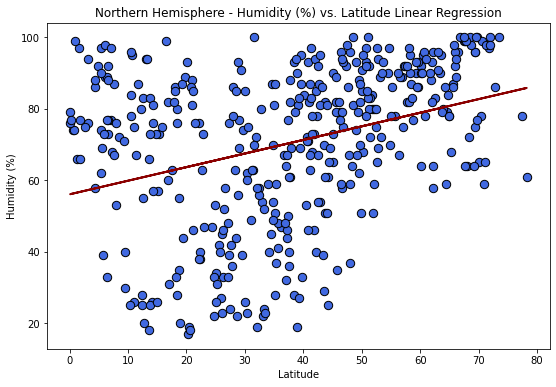

In [179]:
# Define Northern Hemisphere and Humidity
plt.figure(figsize=(9,6))
x_plot = North_Hemisphere_data['Latitude']
y_plot = North_Hemisphere_data['Humidity']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_plot, y_plot)

#Calculate Line
regress_values = x_plot * slope + intercept
Line_equa3 = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {Line_equa3}.")

#create scatter plot
plt.scatter(x_plot,y_plot, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_plot,regress_values, 'darkred', linewidth=2)
plt.annotate(Line_equa3,(8,10),fontsize=18,color="dark red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

#print to the consule
print(f"The r-squared is: {rvalue}")
print("In this Northern Region, this plot cannot find the relation to latitude.") 

plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/Northern Hemisphere - Humidity vs Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.39x + 79.02.
The r-squared is: 0.25667712587091834
The regression shows a neutral correlation.
Humidity at the northern hemisphere seem to increase while Humidity at the southern region is much less. This seems to happen the closer you are in to the equator


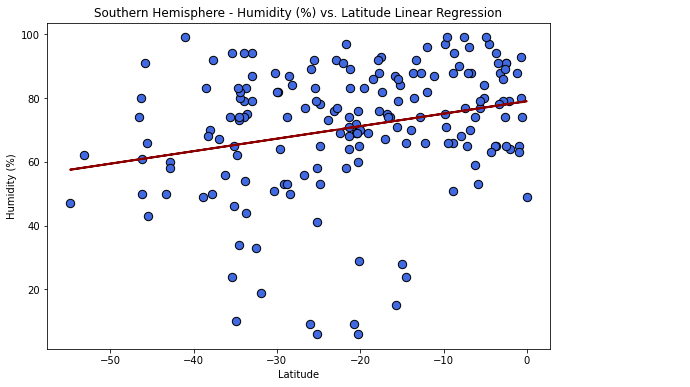

In [190]:
# Define Southern Hemisphere and Humidity
plt.figure(figsize=(9,6))
x_plot = South_Hemisphere_data['Latitude']
y_plot = South_Hemisphere_data['Humidity']

#Perform Line regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_plot, y_plot)

#Calculate equation
regress_values = x_plot * slope + intercept
Line_equa4 = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {Line_equa4}.")

#Create plot
plt.scatter(x_plot,y_plot, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_plot,regress_values, 'darkred', linewidth=2)
plt.annotate(Line_equa4,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

#Print Humidity difference between Southern vs Northern
print(f"The r-squared is: {rvalue}")
print("The regression shows a neutral correlation.")
print("Humidity at the northern hemisphere seem to increase while Humidity at the southern region is much less. This seems to happen the closer you are in to the equator")

plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/Southern Hemisphere - Humidity vs Latitude Linear Regression.png")



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.44x + 43.3.
The r-squared is: 0.22228090918610938
The regression displays a positive correlation.
In the Northern Hemisphere, this plot shows that cloudiness slightly increases with latitude.


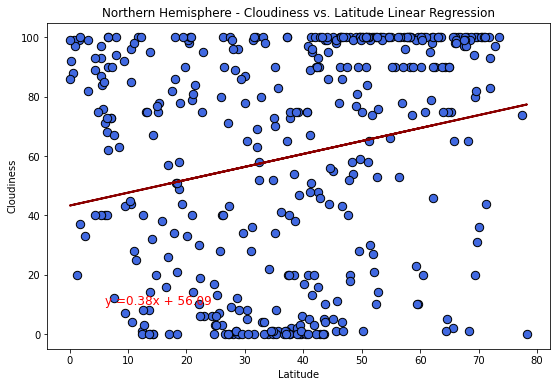

In [182]:
# Define Northern Hemisphere and Cloudiness
plt.figure(figsize=(9,6))
x_plot = North_Hemisphere_data['Latitude']
y_plot = North_Hemisphere_data['Cloudiness']

#Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_plot, y_plot)

#Calculate equation
regress_values = x_plot * slope + intercept
Line_equa6 = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {Line_equa6}.")

#Create Scatter Plot
plt.scatter(x_plot,y_plot, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_plot,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

#Print at the bottom graph
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Northern Hemisphere, this plot shows that cloudiness increases with latitude both up and down .")

plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/Northern Hemisphere - Cloudiness vs Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =1.01x + 72.3.
The r-squared is: 0.36279339608056266
The regression displays a positive correlation.
In the Northern Hemisphere, this plot shows that cloudiness slightly increases with latitude.


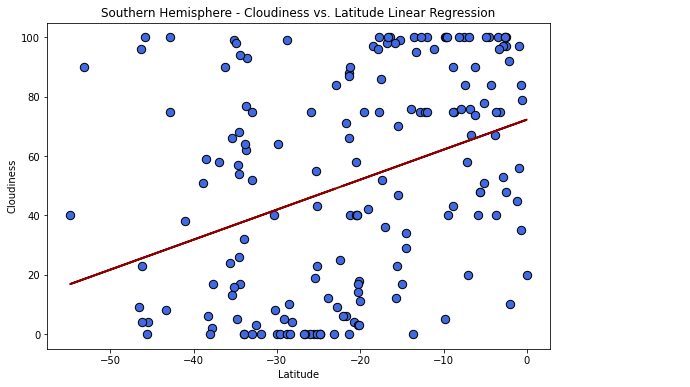

In [183]:
# Define Southern Hemisphere and Cloudiness
plt.figure(figsize=(9,6))
x_plot = South_Hemisphere_data['Latitude']
y_plot = South_Hemisphere_data['Cloudiness']

#Line Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_plot, y_plot)

#Calculate equation
regress_values = x_plot * slope + intercept
Line_equa6 = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {Line_equa6}.")

#Create Scatter Plot
plt.scatter(x_plot,y_plot, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_plot,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

#Print at the bottom graph
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Southern Hemisphere, this plot shows that cloudiness slightly increases with latitude but not by much.")

plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/Southern Hemisphere - Cloudiness vs Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =0.38x + 56.09.
The r-squared is: 0.33762645064107943
The regression displays a neutral/slightly positive correlation.
In the Northern Hemisphere, this plot shows that wind speed stays consistent with latitude.


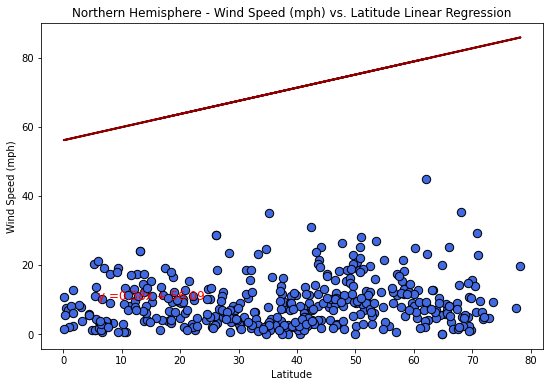

In [187]:
# Northern Hemisphere Wind Speed
plt.figure(figsize=(9,6))
x_plot = North_Hemisphere_data['Latitude']
y_plot = North_Hemisphere_data['Wind Speed']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Calcualte equation
regress_values = x_plot * slope + intercept
Line_equa7 = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {Line_equa7}.")

#Print graph
plt.scatter(x_plot,y_plot, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_plot,regress_values, 'darkred', linewidth=2)
plt.annotate(Line_equa7,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')


#Print at the bottom of a graph
print(f"The r-squared is: {rvalue}")
print("The regression displays a very high wind speed.")

plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/Northern Hemisphere - Wind Speed vs Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =0.38x + 56.09.
The r-squared is: 0.33762645064107943
The regression displays a neutral/slightly positive correlation.
In the Northern Hemisphere, this plot shows that wind speed stays consistent with latitude.


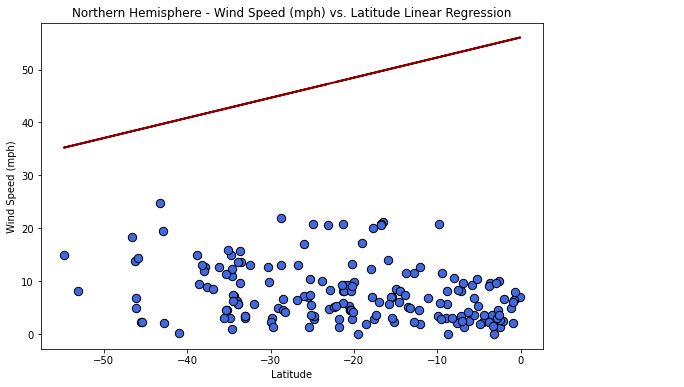

In [188]:
# Northern Hemisphere Wind Speed
plt.figure(figsize=(9,6))
x_plot = South_Hemisphere_data['Latitude']
y_plot = South_Hemisphere_data['Wind Speed']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Calcualte equation
regress_values = x_plot * slope + intercept
Line_equa7 = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {Line_equa7}.")

#Print graph
plt.scatter(x_plot,y_plot, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_plot,regress_values, 'darkred', linewidth=2)
plt.annotate(Line_equa7,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')


#Print at the bottom of a graph
print(f"The r-squared is: {rvalue}")
print("The regression displays a very high positive correlation.")


plt.savefig("C:/Users/Victor M Diaz/Resources/API/Homework/WeatherPy/Weather Images/Southern Hemisphere - Wind Speed vs Latitude Linear Regression.png")